In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

Preparing the dataset

Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [7]:
df = df.iloc[:, [0, 2, 3, 5, 10]]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

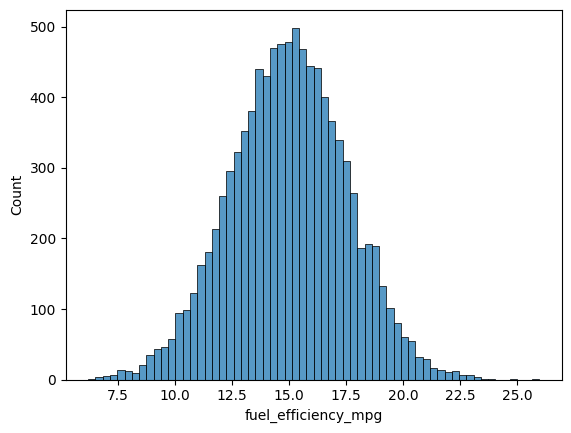

In [40]:
sns.histplot(df.fuel_efficiency_mpg)

fuel_efficiency_mpg variable doesn't have a long tail.

Q1. There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [10]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [ ]:
Q2. What's the median (50% percentile) for variable 'horsepower'?

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [11]:
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [12]:
df.horsepower.median()

np.float64(149.0)

In [13]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [41]:
n_train, n_val, n_test

(5824, 1940, 1940)

In [62]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [63]:
idx = np.arange(n)

In [64]:
np.random.seed(42)
np.random.shuffle(idx)

In [65]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [66]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [67]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [68]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [69]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [70]:
len(y_train)

5824

Q3. We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

In [71]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [72]:
X_train = df_train.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [73]:
w0

np.float64(28.827365474598718)

In [74]:
w

array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04])

<Axes: ylabel='Count'>

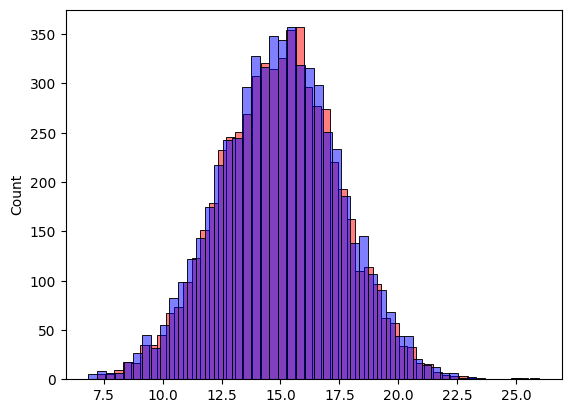

In [75]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [76]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [56]:
rmse(y_train, y_pred).round(2)

np.float64(0.52)

In [92]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [78]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

np.float64(0.52)

In [79]:
X_train = df_train.fillna(df_train.mean()).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [80]:
w0

np.float64(28.92525995211667)

In [81]:
w

array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463])

<Axes: ylabel='Count'>

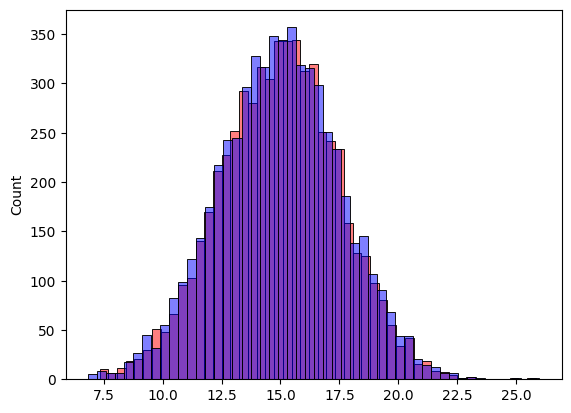

In [82]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [83]:
rmse(y_train, y_pred).round(2)

np.float64(0.46)

In [84]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(df_train.mean())
    X = df_num.values
    return X

In [85]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

np.float64(0.46)

With a lower RMSE indicating better model accuracy, where a perfect model would have an RMSE of zero. In this case filling missing value with mean value leads to a lower RMSE.

Q4. Now let's train a regularized linear regression.

For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.

Options:

0
0.01
1
10
100

In [86]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [89]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
reg_scores = [0, 0.01, 0.1, 1, 5, 10, 100]

results = []

for r in reg_scores:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    results.append({'r': r, 'rmse': rmse_val})
    print(f"r={r:}  RMSE={rmse_val}")

r=0  RMSE=0.5173782638841185
r=0.01  RMSE=0.5171115525775559
r=0.1  RMSE=0.5187525130701629
r=1  RMSE=0.5222348802092528
r=5  RMSE=0.5228916092823455
r=10  RMSE=0.5229812979636569
r=100  RMSE=0.5230636233819926


Q5. We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

0.001
0.006
0.060
0.600
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [99]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_scores = []

for seed in seeds:
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train : n_train + n_val]].reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']

    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)

    rmse_score = rmse(y_val, y_pred)
    rmse_scores.append(rmse_score)

np.std(rmse_scores).round(3)

np.float64(0.007)

Q6. Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.15
0.515
5.15
51.5

In [105]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train : n_train + n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train + n_val : ]].reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df1 = pd.concat([df_train, df_val], ignore_index=True)
X_train = prepare_X(df1)
y_train = np.concatenate([y_train, y_val])

w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X(df_test)

y_pred = w_0 + X_test.dot(w)

rmse(y_test, y_pred).round(3)

np.float64(0.516)